In [61]:
import pandas as pd

xls = pd.ExcelFile("tessi190__custom_17551990_spreadsheet (1).xlsx")
xls.sheet_names
df = xls.parse("Data")
df.head(15)


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Data extracted on 22/07/2025 09:47:54 from [ESTAT],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Dataset:,Gini coefficient of equivalised disposable inc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last updated:,18/07/2025 23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Time frequency,NaN,Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Age class,NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Statistical information,NaN,Gini coefficient (scale from 0 to 100),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,TIME,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
8,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,European Union - 27 countries (from 2020),30.9,30.8,30.6,30.3,30.4,30.2,30,30.2,29.6,29.6,29.3


In [63]:
data = df.iloc[9:].copy()
years = df.iloc[7, 1:12].tolist()
years = [int(y) for y in years]
data = data.iloc[:, 0:12]
data.columns = ['Country'] + years


In [65]:
(data == ":").sum(axis=1)

9      0
10    11
11    11
12     0
13    11
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     4
42     0
43     1
44     6
45     3
46     2
47     6
48     0
49     0
50     0
51     0
52     1
dtype: int64

In [67]:
df_long = data.melt(id_vars='Country', var_name='Year', value_name='Gini')
df_long = df_long.dropna(subset=['Gini']).reset_index(drop=True)
df_long.head()


,Country,Year,Gini
0,European Union - 27 countries (from 2020),2014,30.9
1,European Union - 28 countries (2013-2020),2014,:
2,European Union - 27 countries (2007-2013),2014,:
3,Euro area – 20 countries (from 2023),2014,31
4,Euro area - 19 countries (2015-2022),2014,:


In [69]:
df_long = df_long[~df_long['Country'].str.contains("European Union|Euro area")]
df_long = df_long.reset_index(drop=True)


In [71]:
df_long.head()

,Country,Year,Gini
0,Belgium,2014,25.9
1,Bulgaria,2014,35.4
2,Czechia,2014,25.1
3,Denmark,2014,27.7
4,Germany,2014,30.7


In [73]:
(data == ":").sum(axis=1)

9      0
10    11
11    11
12     0
13    11
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     4
42     0
43     1
44     6
45     3
46     2
47     6
48     0
49     0
50     0
51     0
52     1
dtype: int64

In [75]:
df_long = df_long.dropna(subset=['Gini']).reset_index(drop=True)


In [77]:
df_long.head()

,Country,Year,Gini
0,Belgium,2014,25.9
1,Bulgaria,2014,35.4
2,Czechia,2014,25.1
3,Denmark,2014,27.7
4,Germany,2014,30.7


In [79]:
df_long['Country'].unique()


array(['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Norway',
       'Switzerland', 'United Kingdom', 'Montenegro', 'North Macedonia',
       'Albania', 'Serbia', 'Türkiye', ':'], dtype=object)

In [81]:
df_long.isna().groupby(df_long['Country']).sum()


,Country,Year,Gini
Country,,,
:,0,0,0
Albania,0,0,0
Austria,0,0,0
Belgium,0,0,0
Bulgaria,0,0,0
Croatia,0,0,0
Cyprus,0,0,0
Czechia,0,0,0
Denmark,0,0,0


In [83]:
df_long.head()


,Country,Year,Gini
0,Belgium,2014,25.9
1,Bulgaria,2014,35.4
2,Czechia,2014,25.1
3,Denmark,2014,27.7
4,Germany,2014,30.7


In [85]:
!pip install geopandas


Defaulting to user installation because normal site-packages is not writeable


In [86]:
import sys
!{sys.executable} -m pip install geopandas


Defaulting to user installation because normal site-packages is not writeable


In [87]:
import geopandas as gpd


In [88]:
world = gpd.read_file("ne_110m_admin_0_countries.shp")
europe = world[world['CONTINENT'] == 'Europe']

df_countries = df_long['Country'].unique()
map_data = europe[europe['NAME'].isin(df_countries)]

In [89]:
df_long['Country'].unique()


array(['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Norway',
       'Switzerland', 'United Kingdom', 'Montenegro', 'North Macedonia',
       'Albania', 'Serbia', 'Türkiye', ':'], dtype=object)

In [90]:
country_map = {
    'Türkiye': 'Turkey',
    'North Macedonia': 'Macedonia',
    '': None
}

df_long['Country'] = df_long['Country'].replace(country_map)


In [91]:
df_long['Country'].unique()


array(['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Norway',
       'Switzerland', 'United Kingdom', 'Montenegro', 'Macedonia',
       'Albania', 'Serbia', 'Turkey', ':'], dtype=object)

In [92]:
df_long.head()

,Country,Year,Gini
0,Belgium,2014,25.9
1,Bulgaria,2014,35.4
2,Czechia,2014,25.1
3,Denmark,2014,27.7
4,Germany,2014,30.7


In [93]:

print(df_long['Gini'].unique())


[25.9 35.4 25.1 27.7 30.7 35.6 31 34.5 34.7 29.2 30.2 32.4 34.8 35.5 35
 28.7 28.6 26.2 27.6 30.8 25 26.1 25.6 26.9 22.7 23.5 29.5 31.6 ':' 35.2
 38.3 41.2 'not available' 37 27.4 30.1 29.7 34.2 34.6 30.4 33.6 37.9 28.5
 28.2 28.1 26.7 27.2 30.6 34 37.4 24.5 23.7 25.2 24.7 23.9 29.6 36.5 33.7
 40 41.9 26.3 37.7 32.7 34.3 29.3 29.8 33.1 32.1 33.9 24.4 24.3 25.4 24.1
 29.4 31.5 39.8 42.6 40.2 29.1 33.4 34.1 28.8 29.9 37.6 27.1 27.9 33.5
 23.2 25.3 28 36.7 36.8 37.8 43 25.7 39.6 24 27.8 31.1 28.9 32.3 33.2 36.9
 31.3 26.8 35.1 23.4 20.9 27 24.8 31.9 40.8 27.5 30.5 33 32.8 22.8 41.7
 24.2 27.3 31.4 28.3 32.5 31.2 30.3 33.8 26.5 32.9 43.4 39.7 26.6 35.7
 26.4 23 21.8 33.3 42.5 24.9 38.4 29 32 36.2 23.1 21.2 32.6 45.3 37.2 31.8
 21.6 31.7 44.2 30 32.2 35.3 28.4 26 23.8 21.7 44.8]


In [94]:
df_long['Gini'] = pd.to_numeric(df_long['Gini'], errors='coerce')
df_long = df_long.dropna(subset=['Gini'])


In [95]:
print(df_long['Gini'].unique())

[25.9 35.4 25.1 27.7 30.7 35.6 31.  34.5 34.7 29.2 30.2 32.4 34.8 35.5
 35.  28.7 28.6 26.2 27.6 30.8 25.  26.1 25.6 26.9 22.7 23.5 29.5 31.6
 35.2 38.3 41.2 37.  27.4 30.1 29.7 34.2 34.6 30.4 33.6 37.9 28.5 28.2
 28.1 26.7 27.2 30.6 34.  37.4 24.5 23.7 25.2 24.7 23.9 29.6 36.5 33.7
 40.  41.9 26.3 37.7 32.7 34.3 29.3 29.8 33.1 32.1 33.9 24.4 24.3 25.4
 24.1 29.4 31.5 39.8 42.6 40.2 29.1 33.4 34.1 28.8 29.9 37.6 27.1 27.9
 33.5 23.2 25.3 28.  36.7 36.8 37.8 43.  25.7 39.6 24.  27.8 31.1 28.9
 32.3 33.2 36.9 31.3 26.8 35.1 23.4 20.9 27.  24.8 31.9 40.8 27.5 30.5
 33.  32.8 22.8 41.7 24.2 27.3 31.4 28.3 32.5 31.2 30.3 33.8 26.5 32.9
 43.4 39.7 26.6 35.7 26.4 23.  21.8 33.3 42.5 24.9 38.4 29.  32.  36.2
 23.1 21.2 32.6 45.3 37.2 31.8 21.6 31.7 44.2 30.  32.2 35.3 28.4 26.
 23.8 21.7 44.8]


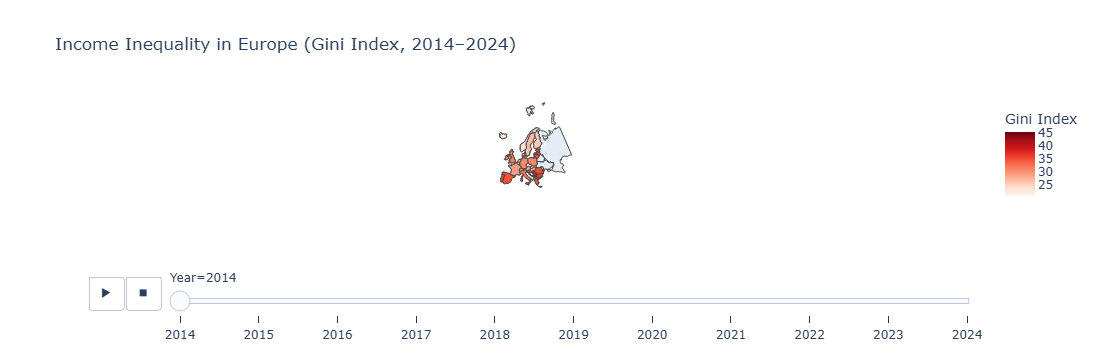

In [96]:
import plotly.express as px

fig = px.choropleth(
    df_long,
    locations="Country",
    locationmode="country names",
    color="Gini",
    hover_name="Country",
    animation_frame="Year",
    color_continuous_scale="Reds",
    range_color=(df_long["Gini"].min(), df_long["Gini"].max()),
    scope="europe",
    title="Income Inequality in Europe (Gini Index, 2014–2024)"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title="Gini Index")
)

fig.show()


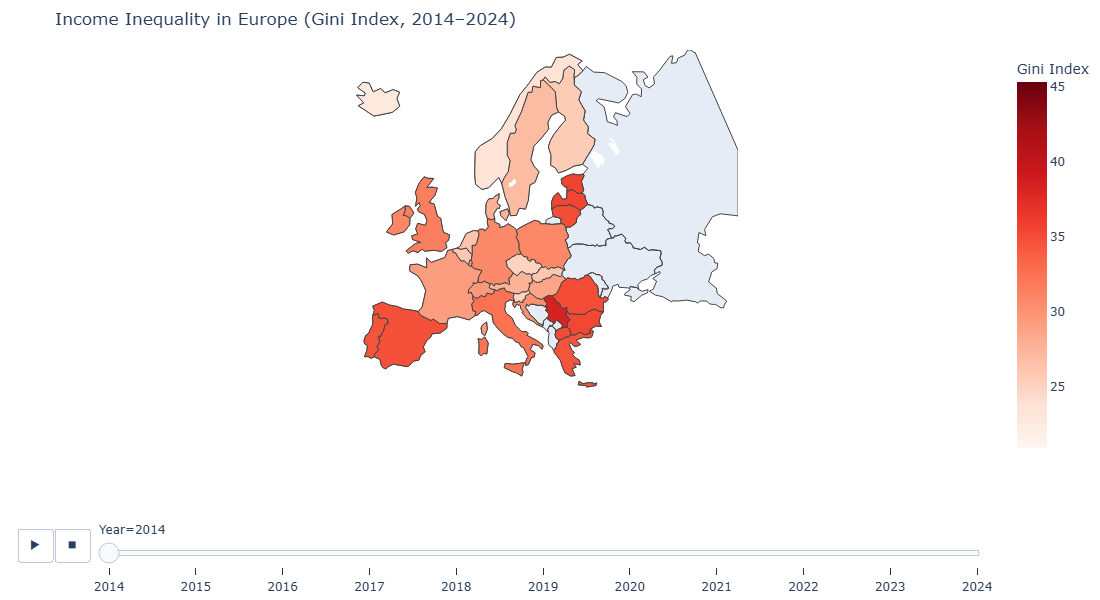

In [100]:
fig.update_geos(
    showframe=False,
    showcoastlines=False,
    lataxis_range=[30, 72],
    lonaxis_range=[-25, 45]
)

fig.update_layout(
    width=1200,
    height=600,
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(title="Gini Index")
)



In [102]:
fig.write_html("gini_map.html")
